In [1]:
import keras

Using TensorFlow backend.


In [2]:
fashion_mnist=keras.datasets.fashion_mnist
(x_train,y_train),(x_test,y_test)=fashion_mnist.load_data()

In [3]:
import matplotlib.pyplot as plt

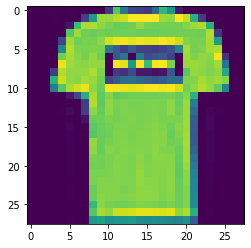

In [4]:
plt.imshow(x_train[1])

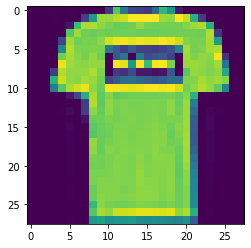

In [5]:
plt.imshow(x_train[1])

In [6]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

### Normalizing data

In [8]:
x_train=x_train/255.0
x_test=x_test/255.0

### Splitting training data into train and validation data

In [10]:
x_valid,x_train=x_train[:5000],x_train[5000:]
y_valid,y_train=y_train[:5000],y_train[5000:]

# Model Building

In [11]:
model=keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28])) # Flatten to convert 28*28 into 1D 784
model.add(keras.layers.Dense(300,activation='relu')) # Hidden layer 1
model.add(keras.layers.Dense(100,activation='relu')) # Hidden Layer 2
model.add(keras.layers.Dense(10,activation='softmax')) # Output layer
model.compile(loss='sparse_categorical_crossentropy',optimizer='sgd',metrics=['accuracy']) # loss and optimizers

In [12]:
model_history=model.fit(x_train,y_train,epochs=30,validation_data=(x_valid,y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 5s 91us/step - loss: 0.7170 - accuracy: 0.7651 - val_loss: 0.5032 - val_accuracy: 0.8308
Epoch 2/30
55000/55000 [==============================] - 5s 87us/step - loss: 0.4929 - accuracy: 0.8275 - val_loss: 0.4610 - val_accuracy: 0.8402
Epoch 3/30
55000/55000 [==============================] - 5s 90us/step - loss: 0.4467 - accuracy: 0.8425 - val_loss: 0.4188 - val_accuracy: 0.8582
Epoch 4/30
55000/55000 [==============================] - 6s 106us/step - loss: 0.4188 - accuracy: 0.8528 - val_loss: 0.4173 - val_accuracy: 0.8516
Epoch 5/30
55000/55000 [==============================] - 5s 93us/step - loss: 0.3972 - accuracy: 0.8605 - val_loss: 0.3823 - val_accuracy: 0.8696
Epoch 6/30
55000/55000 [==============================] - 5s 94us/step - loss: 0.3810 - accuracy: 0.8657 - val_loss: 0.3759 - val_accuracy: 0.8690
Epoch 7/30
55000/55000 [==============================] - 5s 94us/st

In [13]:
model_history.params

{'batch_size': 32,
 'epochs': 30,
 'steps': None,
 'samples': 55000,
 'verbose': 1,
 'do_validation': True,
 'metrics': ['loss', 'accuracy', 'val_loss', 'val_accuracy']}

In [14]:
model_history.history

{'val_loss': [0.5031656807422638,
  0.46096440811157224,
  0.41879563641548156,
  0.4173289874434471,
  0.38228818858861924,
  0.3759426197528839,
  0.35758754456043246,
  0.3592143246650696,
  0.35243240047693253,
  0.3451641120553017,
  0.3745827665090561,
  0.3286912300646305,
  0.322138963329792,
  0.32430504157543183,
  0.3247020832180977,
  0.31801664007306096,
  0.3206825778365135,
  0.33553677802085874,
  0.30885252779722216,
  0.3256956739127636,
  0.31357199369072913,
  0.30929241757392884,
  0.32442824393510816,
  0.2937776680827141,
  0.31612932184934617,
  0.29680341970622537,
  0.30689462369680404,
  0.30376068618297575,
  0.30499407806396484,
  0.30568909625709056],
 'val_accuracy': [0.8307999968528748,
  0.8402000069618225,
  0.8582000136375427,
  0.8515999913215637,
  0.8695999979972839,
  0.8690000176429749,
  0.8784000277519226,
  0.8741999864578247,
  0.8751999735832214,
  0.8745999932289124,
  0.8637999892234802,
  0.8830000162124634,
  0.8853999972343445,
  0.8849

In [16]:
import pandas as pd

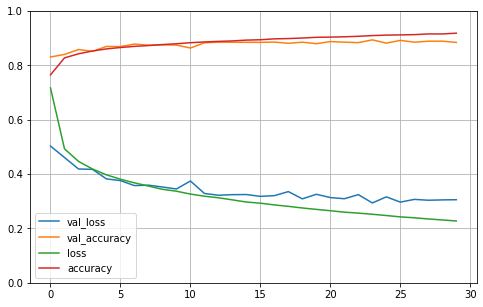

In [18]:
pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [19]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_2 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [20]:
weights1,biases1=model.layers[1].get_weights() # First layer

In [21]:
weights1

array([[ 0.03728227, -0.0020578 ,  0.0465365 , ...,  0.06728382,
        -0.05051509,  0.04530342],
       [ 0.05932716, -0.0089924 , -0.06643976, ..., -0.02736903,
         0.00888208, -0.05363593],
       [ 0.04385217, -0.00081139,  0.05365853, ...,  0.04443881,
         0.04936643,  0.00653212],
       ...,
       [ 0.02818109,  0.02063723,  0.06609206, ..., -0.05823121,
         0.04767236,  0.05665664],
       [-0.06705138, -0.05129656, -0.04784586, ..., -0.07401649,
        -0.0267628 ,  0.05196651],
       [-0.07082145, -0.00199925,  0.04472316, ...,  0.03030126,
        -0.0214256 , -0.04397429]], dtype=float32)

In [22]:
weights1.shape

(784, 300)

In [23]:
biases1.shape

(300,)

In [24]:
weights2,biases2=model.layers[2].get_weights() # second layer

In [25]:
weights2.shape

(300, 100)

In [26]:
biases2.shape

(100,)

In [27]:
weights3,biases3=model.layers[3].get_weights() # Third layer

In [28]:
weights3.shape

(100, 10)

In [29]:
biases3.shape

(10,)

In [30]:
weights3

array([[ 2.20316052e-01,  1.14476405e-01,  1.69276878e-01,
        -3.60860825e-01,  2.56077915e-01,  9.30311233e-02,
        -9.63095129e-02,  1.97231665e-01, -2.13232294e-01,
        -3.82994652e-01],
       [ 1.58369258e-01, -1.89970806e-02,  2.60693699e-01,
        -2.60468274e-01, -2.77140796e-01, -2.05235586e-01,
        -4.72356617e-01, -2.42790952e-01,  3.32032114e-01,
         3.87294918e-01],
       [ 1.63019732e-01,  1.97673470e-01, -1.73864827e-01,
        -2.01509863e-01,  3.25235389e-02,  1.89165398e-02,
         3.70019898e-02, -3.49632241e-02, -1.51776552e-01,
         1.81869566e-01],
       [-1.35678157e-01,  6.46945834e-02,  8.38637128e-02,
         1.46076069e-04,  1.27266437e-01,  9.54082832e-02,
        -5.46869636e-01,  3.43179911e-01,  3.20667058e-01,
        -2.34584540e-01],
       [-2.52813101e-01,  9.32741314e-02,  1.44201696e-01,
        -2.91094005e-01, -2.81700313e-01,  1.09208927e-01,
         3.86398464e-01,  6.37796298e-02,  1.13098301e-01,
        -2.

### Evaluation

In [32]:
model.evaluate(x_test,y_test)

10000/10000 [==============================] - 1s 105us/step


[0.3369321231126785, 0.8755999803543091]

In [ ]:
#### Loss is 0.3369 Accuracy=0.8755

### Predictions on new Unseen data

In [35]:
x_new=x_test[:3] # Let's say there are 3 new records

In [37]:
y_proba=model.predict(x_new)
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [38]:
y_pred=model.predict_classes(x_new)
y_pred

array([9, 2, 1], dtype=int64)

### Saving and Restoring model

In [40]:
model.save("image_classifier_keras.h5")

In [41]:
%pwd

'C:\\Users\\sidre\\Desktop\\sri\\Python codes'

In [42]:
del model

In [43]:
keras.backend.clear_session()

In [ ]:
##### Cleared model and keras backend and loading saved model

In [44]:
model=keras.models.load_model("image_classifier_keras.h5")

In [45]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_2 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [48]:
y_pred=model.predict_classes(x_new)

In [49]:
print(y_pred)

[9 2 1]


### Using callbacks during Training... when the data size is high,we can use callbacks to save model after each epoch

In [65]:
keras.backend.clear_session()

In [66]:
import tensorflow as tf
import numpy as np
np.random.seed(42)
tf.random.set_seed(42)

In [67]:
model=keras.models.Sequential([keras.layers.Flatten(input_shape=[28,28]),
                               keras.layers.Dense(30,activation='relu'),
                               keras.layers.Dense(30,activation='relu'),
                               keras.layers.Dense(10,activation='softmax')])

In [68]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='sgd',metrics=['accuracy']) # loss and optimizers

In [69]:
checkpoint_cb=keras.callbacks.ModelCheckpoint("image_classifier_Model-{epoch:02d}.h5")

In [70]:
history=model.fit(x_train,y_train,epochs=10,validation_data=(x_valid,y_valid),callbacks=[checkpoint_cb])

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 5s 83us/step - loss: 0.8945 - accuracy: 0.7094 - val_loss: 0.5666 - val_accuracy: 0.8112
Epoch 2/10
55000/55000 [==============================] - 5s 91us/step - loss: 0.5411 - accuracy: 0.8129 - val_loss: 0.4734 - val_accuracy: 0.8388
Epoch 3/10
55000/55000 [==============================] - 6s 103us/step - loss: 0.4844 - accuracy: 0.8302 - val_loss: 0.4431 - val_accuracy: 0.8478
Epoch 4/10
55000/55000 [==============================] - 5s 87us/step - loss: 0.4560 - accuracy: 0.8390 - val_loss: 0.4357 - val_accuracy: 0.8520
Epoch 5/10
55000/55000 [==============================] - 5s 82us/step - loss: 0.4351 - accuracy: 0.8488 - val_loss: 0.4204 - val_accuracy: 0.8574
Epoch 6/10
55000/55000 [==============================] - 4s 77us/step - loss: 0.4212 - accuracy: 0.8533 - val_loss: 0.4208 - val_accuracy: 0.8570
Epoch 7/10
55000/55000 [==============================] - 5s 83us/st

In [71]:
del model

In [72]:
keras.backend.clear_session()

In [73]:
model=keras.models.load_model("image_classifier_Model-10.h5")

In [74]:
model.evaluate(x_test,y_test)

10000/10000 [==============================] - 0s 44us/step


[0.4189669068813324, 0.8535000085830688]

In [75]:
model.predict_classes(x_new)

array([9, 2, 1], dtype=int64)

### Instead of saving model in each epoch,saving only best model only can be done by setting save_best_only=True in callbacks

In [77]:
keras.backend.clear_session()

import tensorflow as tf
import numpy as np
np.random.seed(42)
tf.random.set_seed(42)

model=keras.models.Sequential([keras.layers.Flatten(input_shape=[28,28]),
                               keras.layers.Dense(30,activation='relu'),
                               keras.layers.Dense(30,activation='relu'),
                               keras.layers.Dense(10,activation='softmax')])

model.compile(loss='sparse_categorical_crossentropy',optimizer='sgd',metrics=['accuracy']) # loss and optimizers

checkpoint_cb=keras.callbacks.ModelCheckpoint("image_classifier_best_model.h5",save_best_only=True)

history=model.fit(x_train,y_train,epochs=10,validation_data=(x_valid,y_valid),callbacks=[checkpoint_cb])

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 6s 114us/step - loss: 0.8945 - accuracy: 0.7094 - val_loss: 0.5666 - val_accuracy: 0.8112
Epoch 2/10
55000/55000 [==============================] - 6s 108us/step - loss: 0.5411 - accuracy: 0.8129 - val_loss: 0.4734 - val_accuracy: 0.8388
Epoch 3/10
55000/55000 [==============================] - 6s 118us/step - loss: 0.4844 - accuracy: 0.8302 - val_loss: 0.4431 - val_accuracy: 0.8478
Epoch 4/10
55000/55000 [==============================] - 6s 105us/step - loss: 0.4560 - accuracy: 0.8390 - val_loss: 0.4357 - val_accuracy: 0.8520
Epoch 5/10
55000/55000 [==============================] - 6s 106us/step - loss: 0.4351 - accuracy: 0.8488 - val_loss: 0.4204 - val_accuracy: 0.8574
Epoch 6/10
55000/55000 [==============================] - 6s 112us/step - loss: 0.4212 - accuracy: 0.8533 - val_loss: 0.4208 - val_accuracy: 0.8570
Epoch 7/10
55000/55000 [==============================] - 6s 10

In [78]:
del model

In [79]:
keras.backend.clear_session()

### Loading best model only

In [80]:
model=keras.models.load_model("image_classifier_best_model.h5")

In [81]:
model.evaluate(x_test,y_test)

10000/10000 [==============================] - 1s 72us/step


[0.4189669068813324, 0.8535000085830688]

In [83]:
model.predict_classes(x_new)

array([9, 2, 1], dtype=int64)

In [85]:
del model

### Using Early stopping

In [88]:
keras.backend.clear_session()

import tensorflow as tf
import numpy as np
np.random.seed(42)
tf.random.set_seed(42)

model=keras.models.Sequential([keras.layers.Flatten(input_shape=[28,28]),
                               keras.layers.Dense(30,activation='relu'),
                               keras.layers.Dense(30,activation='relu'),
                               keras.layers.Dense(10,activation='softmax')])

model.compile(loss='sparse_categorical_crossentropy',optimizer='sgd',metrics=['accuracy']) # loss and optimizers

checkpoint_cb=keras.callbacks.ModelCheckpoint("image_classifier_early_stopped_model.h5",save_best_only=True)
early_stopping_cb=keras.callbacks.EarlyStopping(patience=10,restore_best_weights=True)
##### Number of epochs after which no improvement after which training will be stopped
history=model.fit(x_train,y_train,epochs=200,validation_data=(x_valid,y_valid),callbacks=[checkpoint_cb,early_stopping_cb])

Train on 55000 samples, validate on 5000 samples
Epoch 1/200
55000/55000 [==============================] - 7s 120us/step - loss: 0.8945 - accuracy: 0.7094 - val_loss: 0.5666 - val_accuracy: 0.8112
Epoch 2/200
55000/55000 [==============================] - 7s 123us/step - loss: 0.5411 - accuracy: 0.8129 - val_loss: 0.4734 - val_accuracy: 0.8388
Epoch 3/200
55000/55000 [==============================] - 6s 117us/step - loss: 0.4844 - accuracy: 0.8302 - val_loss: 0.4431 - val_accuracy: 0.8478
Epoch 4/200
55000/55000 [==============================] - 6s 111us/step - loss: 0.4560 - accuracy: 0.8390 - val_loss: 0.4357 - val_accuracy: 0.8520
Epoch 5/200
55000/55000 [==============================] - 7s 122us/step - loss: 0.4351 - accuracy: 0.8488 - val_loss: 0.4204 - val_accuracy: 0.8574
Epoch 6/200
55000/55000 [==============================] - 7s 123us/step - loss: 0.4212 - accuracy: 0.8533 - val_loss: 0.4208 - val_accuracy: 0.8570
Epoch 7/200
55000/55000 [==============================] 

In [89]:
del model
keras.backend.clear_session()

In [91]:
model=keras.models.load_model("image_classifier_early_stopped_model.h5")
print(model.evaluate(x_test,y_test))
model.predict_classes(x_new)

10000/10000 [==============================] - 0s 22us/step
[0.36686684391498564, 0.8689000010490417]


array([9, 2, 1], dtype=int64)